In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import all raw data files
balance_sheet_yahoo = pd.read_csv(
    r'C:\Users\Michael.CamdenSmith\PersonalAnalysis\EuronextAnalysis\data\raw\balance_sheet_yahoo.csv', sep='|')
cashflow_yahoo = pd.read_csv(r'C:\Users\Michael.CamdenSmith\PersonalAnalysis\EuronextAnalysis\data\raw\cashflow_yahoo.csv', sep='|')
earnings_yahoo = pd.read_csv(r'C:\Users\Michael.CamdenSmith\PersonalAnalysis\EuronextAnalysis\data\raw\earnings_yahoo.csv', sep='|')
financials_yahoo = pd.read_csv(r'C:\Users\Michael.CamdenSmith\PersonalAnalysis\EuronextAnalysis\data\raw\financials_yahoo.csv', sep='|')
price_yahoo = pd.read_csv(r'C:\Users\Michael.CamdenSmith\PersonalAnalysis\EuronextAnalysis\data\raw\price_yahoo.csv', sep='|')
stock_info_euronext = pd.read_csv(r'C:\Users\Michael.CamdenSmith\PersonalAnalysis\EuronextAnalysis\data\interim\us_stocks.csv', sep='|')
stock_info_yahoo = pd.read_csv(r'C:\Users\Michael.CamdenSmith\PersonalAnalysis\EuronextAnalysis\data\raw\stock_info_yahoo.csv', sep='|')

In [6]:
# Lets look how much of each data is available from Yahoo Finance for our dataset
distinct_isins = {
    'balance_sheet_yahoo': balance_sheet_yahoo['stock_isin'].nunique(),
    'cashflow_yahoo' : cashflow_yahoo['stock_isin'].nunique(),
    'earnings_yahoo' : earnings_yahoo['stock_isin'].nunique(),
    'financials_yahoo' : financials_yahoo['stock_isin'].nunique(),
    'price_yahoo' : price_yahoo['stock_isin'].nunique(),
    'stock_info_euronext' : stock_info_euronext['stock_isin'].nunique(),
    'stock_info_yahoo': stock_info_yahoo['stock_isin'].nunique()
} 
distinct_isins = pd.DataFrame.from_dict(distinct_isins, orient='index', 
                    columns = ['distinct_isins']).sort_values('distinct_isins', ascending=False)
distinct_isins['data_gap'] = stock_info_euronext['stock_isin'].nunique(
)  - distinct_isins['distinct_isins']
distinct_isins


,distinct_isins,data_gap
stock_info_euronext,500,0
balance_sheet_yahoo,498,2
cashflow_yahoo,498,2
earnings_yahoo,498,2
financials_yahoo,498,2
stock_info_yahoo,498,2
price_yahoo,494,6


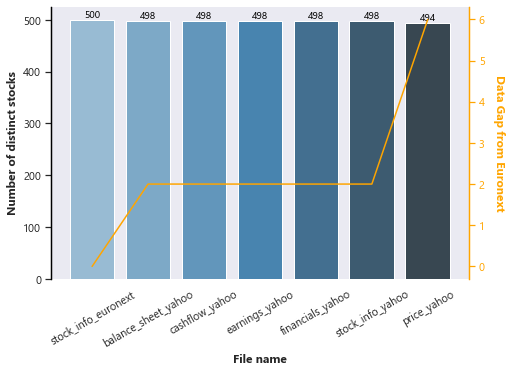

In [7]:
sns.set_theme(style='dark', font='Segoe UI')
fig, ax1 = plt.subplots(figsize=(7.5, 5))
ax2 = ax1.twinx()
# Create palette:
# https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
pal = sns.color_palette("Blues_d", len(distinct_isins.index))
# Add bar plot for data retrieved
sns.barplot(x=distinct_isins.index, y='distinct_isins',
            palette=pal, data=distinct_isins, ax=ax1)
# Add bar plot for data retrieved
sns.lineplot(x=distinct_isins.index, y='data_gap',
             data=distinct_isins, ax=ax2, color='orange')
# Rename y-axis
ax1.set_ylabel('Number of distinct stocks', weight='bold')
ax2.set_ylabel('Data Gap from Euronext',
               weight='bold', rotation=270, labelpad=20, color='orange')
# Change color of labels
ax2.tick_params(colors='orange')
ax1.spines['right'].set_color('orange')
ax2.spines['right'].set_color('orange')
ax1.spines['left'].set_color('black')
ax2.spines['left'].set_color('black')
# Rename x-axis
ax1.set_xlabel('File name', weight='bold')
# Rotate labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
# Iterate through to add data labels
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
             fontsize=10, color='black', ha='center', va='bottom')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
